# Sentiment analysis tool on the Reddit posts which are predicted as positive and contains the medication keywords.

# Google Drive connection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read saved xlsx files

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth',None)   #this displays the dataframe in full width

In [ ]:
Validation_result = pd.read_excel('/content/drive/MyDrive/Reddit Migraine Dataset/Swati folder/Predicted_Reddit_validation_dataset2.xlsx')
Validation_diff_result = pd.read_excel('/content/drive/MyDrive/Reddit Migraine Dataset/2985 Dataset/Predicted_Reddit_validation_diff_dataset.xlsx')
Validation_diff_result2 = pd.read_excel('/content/drive/MyDrive/Reddit Migraine Dataset/2985 Dataset/Model_Predicted_Reddit_test_diff_dataset.xlsx')

In [ ]:
print("Validation_result:",Validation_result.shape)
print("Validation_diff_result:",Validation_diff_result.shape)
print("Validation_diff_result2:",Validation_diff_result2.shape)

Validation_result: (1207, 7)
Validation_diff_result: (1178, 7)
Validation_diff_result2: (296, 7)


In [ ]:
Validation_overall = Validation_result.append(Validation_diff_result)
Validation_overall = Validation_overall.append(Validation_diff_result2)
Validation_overall = Validation_overall.reset_index(drop=True)

In [ ]:
Validation_overall.shape  

(2681, 7)

In [ ]:
Validation_overall['Max_prediction'].value_counts()

0    1406
1    1275
Name: Max_prediction, dtype: int64

In [ ]:
# Our concern is only with the entries that have been predicted as positive
Validation_positive = Validation_overall[Validation_overall['Max_prediction']==1]
Validation_positive = Validation_positive.reset_index(drop=True)

In [ ]:
Validation_positive.shape

(1275, 7)

# Some information about the medicines
See the table below:

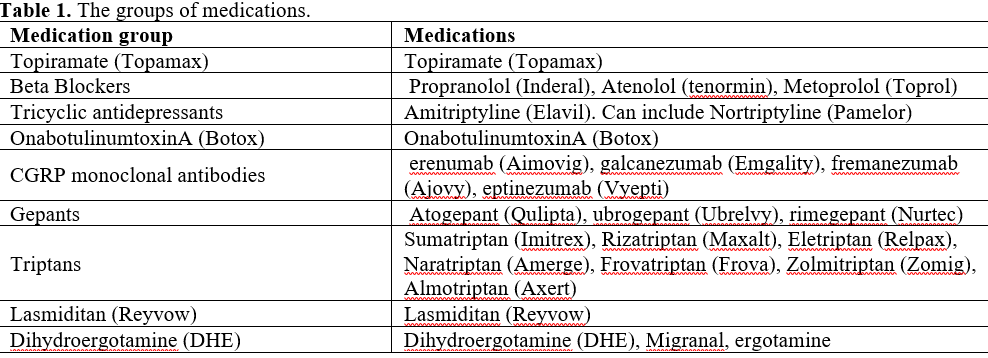

In [ ]:
# medication_class = ['Topiramate (Topamax)','Beta Blockers','Tricyclic antidepressants','OnabotulinumtoxinA (Botox)','CGRP monoclonal antibodies','Gepants','Triptans','Lasmiditan (Reyvow)','Dihydroergotamine (DHE)']

'Medication Group' are the umbrella class of medications. The medications that come under each of the Medication group is mentioned in corresponding 'Medications' column. 

For example: 

*'**Propranolol**', sold under the brand name 'Inderal' among others, is a medication of the '**beta blocker**' class.It's used to treat heart problems, help with anxiety and prevent migraines.*

# Drop unwanted columns & Rename one

In [ ]:
Validation_positive=Validation_positive.drop(['text_w/o_stopwords','text_w/o_punctuations','split_text','predictions'],axis=1)
Validation_positive.rename(columns = {'Max_prediction':'predicted_label'}, inplace = True)

# Reddit Posts that contain the keywords

In [ ]:
medication_keywords = ['Topiramate','Topamax','Propranolol','Inderal', 'Atenolol','tenormin', 'Metoprolol','Toprol','Amitriptyline','Elavil','Nortriptyline', 'Pamelor','OnabotulinumtoxinA','Botox','erenumab','Aimovig', 'galcanezumab','Emgality', 'fremanezumab','Ajovy','eptinezumab','Vyepti','Atogepant','Qulipta', 'ubrogepant','Ubrelvy', 'rimegepant','Nurtec',
'Sumatriptan','Imitrex', 'Rizatriptan','Maxalt', 'Eletriptan','Relpax', 'Naratriptan','Amerge', 'Frovatriptan','Frova', 'Zolmitriptan','Zomig', 'Almotriptan','Axert',
'Lasmiditan','Reyvow','Dihydroergotamine','DHE','Migranal', 'ergotamine',]

medication_keywords = [x.lower() for x in medication_keywords]    #All in lower letters

# Sentiment score

In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.0 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
sentences = Validation_positive['text']
sentiment=[]
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    sent=vs['compound']
    sentiment.append(sent)

Validation_positive['sentiment score'] = sentiment  # Store score of each reddit text in new column

# Medication-Brand name Dictionary

In [ ]:
Brand_name_Dict = {'Topiramate':'Topamax','Topamax':'Topamax','Propranolol':'Inderal','Inderal':'Inderal','Atenolol':'tenormin','tenormin':'tenormin','Metoprolol':'Toprol','Toprol':'Toprol','Amitriptyline':'Elavil','Elavil':'Elavil','Nortriptyline':'Pamelor','Pamelor':'Pamelor','OnabotulinumtoxinA':'Botox','Botox':'Botox','erenumab':'Aimovig','Aimovig':'Aimovig','galcanezumab':'Emgality','Emgality':'Emgality','fremanezumab':'Ajovy','Ajovy':'Ajovy','eptinezumab':'Vyepti','Vyepti':'Vyepti','Atogepant':'Qulipta','Qulipta':'Qulipta','ubrogepant':'Ubrelvy','Ubrelvy':'Ubrelvy','rimegepant':'Nurtec','Nurtec':'Nurtec','Sumatriptan':'Imitrex','Imitrex':'Imitrex', 'Rizatriptan':'Maxalt','Maxalt':'Maxalt','Eletriptan':'Relpax','Relpax':'Relpax','Naratriptan':'Amerge','Amerge':'Amerge','Frovatriptan':'Frova','Frova':'Frova','Zolmitriptan':'Zomig','Zomig':'Zomig','Almotriptan':'Axert','Axert':'Axert','Lasmiditan':'Reyvow','Reyvow':'Reyvow','Dihydroergotamine':'DHE','DHE':'DHE','Dihydroergotamine':'Migranal','Migranal':'Migranal','ergotamine':'ergotamine','ergotamine':'Ergot','Ergot':'Ergot'}
Brand_name_Dict = dict((k.lower(), v.lower()) for k, v in Brand_name_Dict.items())   # Converting to lower letter for easy comparision

In [ ]:
len(Brand_name_Dict)

49

# Medications-Medication Groups Dictionary

In [ ]:
Med_Group_Dict = {'Topiramate':'Topiramate (Topamax)','Topamax':'Topiramate (Topamax)','Propranolol':'Beta Blockers','Inderal':'Beta Blockers','tenormin':'Beta Blockers','Toprol':'Beta Blockers','Atenolol':'Beta Blockers','Metoprolol':'Beta Blockers','Amitriptyline':'Tricyclic antidepressants','Elavil':'Tricyclic antidepressants','Nortriptyline':'Tricyclic antidepressants','Pamelor':'Tricyclic antidepressants','OnabotulinumtoxinA':'OnabotulinumtoxinA (Botox)','Botox':'OnabotulinumtoxinA (Botox)','erenumab':'CGRP monoclonal antibodies','Aimovig':'CGRP monoclonal antibodies','galcanezumab':'CGRP monoclonal antibodies','Emgality':'CGRP monoclonal antibodies','fremanezumab':'CGRP monoclonal antibodies','Ajovy':'CGRP monoclonal antibodies','eptinezumab':'CGRP monoclonal antibodies','Vyepti':'CGRP monoclonal antibodies','Atogepant':'Gepants','Qulipta':'Gepants','Ubrelvy':'Gepants','Nurtec':'Gepants','ubrogepant':'Gepants','rimegepant':'Gepants','Imitrex':'Triptans','Maxalt':'Triptans','Relpax':'Triptans','Amerge':'Triptans','Frova':'Triptans','Zomig':'Triptans','Axert':'Triptans','Sumatriptan':'Triptans','Rizatriptan':'Triptans','Eletriptan':'Triptans','Naratriptan':'Triptans','Frovatriptan':'Triptans','Zolmitriptan':'Triptans','Almotriptan':'Triptans','Reyvow':'Lasmiditan (Reyvow)','Lasmiditan':'Lasmiditan (Reyvow)','Dihydroergotamine':' Dihydroergotamine (DHE)','ergotamine':'Dihydroergotamine (DHE)'}
Med_Group_Dict = dict((k.lower(), v.lower()) for k, v in Med_Group_Dict.items())   # Converting to lower letter for easy comparision

In [ ]:
len(Med_Group_Dict)

46

# Processing Reddit Text to find medication name, brand, and group

Apart from this, we also need to look at the frequency, mean, median, and standard deviation for each of the medication group

In [ ]:
Validation_positive['medication_matched'] = ''
Validation_positive['brand_name'] = ''
Validation_positive['med_group'] = ''

In [ ]:
# To store all sentiment scores for each medication group
senti_score_dict = {'Topiramate (Topamax)':[], 'Beta Blockers':[], 'Tricyclic antidepressants':[], 'OnabotulinumtoxinA (Botox)':[], 'CGRP monoclonal antibodies':[], 'Gepants':[], 'Triptans':[], 'Lasmiditan (Reyvow)':[], 'Dihydroergotamine (DHE)':[]}
senti_score_dict = dict((k.lower(), v) for k, v in senti_score_dict.items())   # Converting to lower letter for easy comparision

In [ ]:
# To track frequency of each medication group
frequency_dict = {'Topiramate (Topamax)':0, 'Beta Blockers':0, 'Tricyclic antidepressants':0, 'OnabotulinumtoxinA (Botox)':0, 'CGRP monoclonal antibodies':0, 'Gepants':0, 'Triptans':0, 'Lasmiditan (Reyvow)':0, 'Dihydroergotamine (DHE)':0}
frequency_dict = dict((k.lower(), v) for k, v in frequency_dict.items())   # Converting to lower letter for easy comparision

In [ ]:
for i in range(len(Validation_positive)):
  curr_sentence = Validation_positive['text'][i].lower().split()   # Convert str into list of words
  matches = list(set(curr_sentence).intersection(set(medication_keywords)))
  
  if(matches):
    Validation_positive['medication_matched'][i] = matches
    brand_name = []  
    group_name = []
    for j in range(len(matches)):
      dict_brand_value = Brand_name_Dict.get(matches[j])
      dict_group_value = Med_Group_Dict.get(matches[j])
      if(dict_brand_value!=None):
        brand_name.append(dict_brand_value)  

      if(dict_group_value!=None):
        group_name.append(dict_group_value)
        
        frequency_dict[dict_group_value] = frequency_dict[dict_group_value]+1  # Update the frequency
        senti_score_dict[dict_group_value].append(Validation_positive['sentiment score'][i])

    Validation_positive['brand_name'][i] = list(set(brand_name))
    Validation_positive['med_group'][i] = list(set(group_name))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
Validation_positive.to_excel('sentiment_results.xlsx', index=False)

# Frequency, Mean, Median, and Standard Distribution

In [ ]:
statistic_values = pd.DataFrame(columns=['group_name','frequency','mean','median','Standard_deviation'])

In [ ]:
statistic_values['group_name'] = frequency_dict.keys()
statistic_values['sentiment_scores'] = list(senti_score_dict.values())
statistic_values['frequency'] = frequency_dict.values()

In [ ]:
mean_list = []
median_list = []
sd_list = []
senti_scores = list(senti_score_dict.values())
for i in range(len(senti_scores)):
  mean_list.append(round(np.mean(senti_scores[i]),2))
  median_list.append(round(np.median(senti_scores[i]),2))
  sd_list.append(round(np.std(senti_scores[i]),2))

In [ ]:
statistic_values['mean'] = mean_list
statistic_values['median'] = median_list
statistic_values['Standard_deviation'] = sd_list
statistic_values.fillna(0)

,group_name,frequency,mean,median,Standard_deviation,sentiment_scores
0,topiramate (topamax),32,-0.17,-0.36,0.71,"[-0.8459, 0.8869, -0.0772, 0.3821, -0.7269, -0.9132, 0.1869, -0.9867, 0.8555, 0.9826, -0.7685, -0.9755, 0.8966, -0.9749, -0.997, 0.7606, -0.2655, 0.8564, -0.3553, -0.276, -0.8181, 0.0, 0.8919, -0.5719, -0.8487, -0.9636, 0.6643, 0.6868, -0.4678, -0.3716, -0.8274, -0.5106]"
1,beta blockers,18,0.39,0.63,0.64,"[0.8869, 0.8869, 0.3197, 0.8555, -0.296, -0.997, -0.6497, 0.5821, -0.8181, 0.9657, 0.5623, 0.9052, 0.4425, 0.6868, 0.9522, 0.0, 0.963, 0.8532]"
2,tricyclic antidepressants,30,-0.30,-0.66,0.74,"[-0.0772, -0.9153, -0.6504, -0.6504, 0.9302, -0.9132, 0.9837, -0.3818, -0.9983, -0.9638, -0.9032, 0.8966, -0.997, -0.8181, -0.9889, -0.4516, 0.8114, -0.7732, 0.9237, 0.6643, -0.904, -0.9978, 0.9661, -0.6652, -0.8619, 0.3022, 0.1134, -0.8846, -0.7987, 0.1134]"
3,onabotulinumtoxina (botox),41,0.01,0.18,0.75,"[0.8869, -0.8072, 0.2519, 0.888, 0.1779, 0.3821, -0.9148, -0.9503, 0.9419, 0.9025, -0.9324, 0.6521, -0.5704, 0.802, 0.8771, -0.9314, -0.5719, 0.6996, -0.8927, -0.4209, 0.9431, 0.5982, -0.8181, -0.7964, -0.4871, -0.9636, -0.878, 0.8036, -0.8949, 0.8395, 0.2732, -0.3421, 0.4588, 0.9577, 0.802, 0.7925, 0.5628, -0.098, -0.8846, -0.9732, 0.0]"
4,cgrp monoclonal antibodies,41,-0.07,-0.30,0.77,"[-0.8459, 0.3786, 0.888, 0.888, -0.9855, 0.1779, -0.0415, -0.6553, -0.9373, -0.9132, 0.5985, -0.933, -0.8246, -0.7514, 0.825, -0.9849, -0.6906, -0.6906, 0.9826, 0.8771, -0.4588, -0.6965, -0.9597, -0.296, -0.9268, 0.8592, -0.997, -0.9015, 0.9346, 0.8564, -0.3553, 0.6808, 0.6808, -0.7614, -0.7899, 0.811, 0.7783, 0.886, 0.9237, 0.6643, -0.296]"
5,gepants,39,-0.04,0.25,0.78,"[-0.8459, -0.8459, -0.9334, -0.736, 0.93, 0.2519, -0.7983, 0.9573, -0.984, -0.9274, -0.9148, -0.7255, -0.9486, 0.2622, 0.2622, 0.5985, -0.6906, 0.8771, 0.6508, -0.296, -0.9268, 0.9826, 0.9826, -0.81, -0.81, 0.8592, -0.997, 0.7964, 0.4215, 0.8564, 0.5982, 0.8839, 0.3386, -0.7614, -0.6241, 0.811, -0.7474, 0.8118, 0.6643]"
6,triptans,64,-0.03,0.06,0.80,"[-0.8459, 0.8869, -0.9896, 0.5029, -0.6059, 0.238, 0.9531, 0.1436, 0.8645, -0.9373, 0.832, 0.9443, 0.9704, 0.6462, 0.796, -0.9333, -0.9132, 0.128, 0.9837, 0.9331, -0.7514, 0.3612, 0.9316, 0.2547, 0.8555, 0.8555, 0.7151, -0.9671, 0.9604, -0.9638, 0.8416, -0.7971, -0.296, 0.0, -0.9755, 0.9826, -0.9032, 0.9884, -0.997, 0.5719, 0.5719, 0.945, -0.8327, 0.4215, -0.5781, -0.9766, -0.8071, 0.5513, -0.9436, -0.5719, 0.8614, -0.9889, -0.9936, -0.4516, -0.9876, -0.7899, -0.885, 0.0, -0.9814, 0.8171, -0.9495, 0.8682, -0.2516, -0.9222]"
7,lasmiditan (reyvow),1,0.48,0.48,0.00,[0.4755]
8,dihydroergotamine (dhe),0,0.00,0.00,0.00,[]


# Sentiment Distributions

In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# # Please note that frequency of lasmiditan (reyvow) and dihydroergotamine (dhe)	is 1 and 0, respectively. Therefore, they are not plotted in the following graph

# import numpy as np
# import scipy.stats as stats
# import matplotlib.pyplot as plt
# plt_1 = plt.figure(figsize=(9, 5))

# h0 = statistic_values['sentiment_scores'][0]
# h0.sort()
# plt.plot(h0, stats.norm.pdf(h0, np.mean(h0), np.std(h0)),label = 'topiramate (topamax)')

# h1 = statistic_values['sentiment_scores'][1]
# h1.sort()
# plt.plot(h1, stats.norm.pdf(h1, np.mean(h1), np.std(h1)),label = 'beta blockers')

# h2 = statistic_values['sentiment_scores'][2]
# h2.sort()
# plt.plot(h2, stats.norm.pdf(h2, np.mean(h2), np.std(h2)),label = 'tricyclic antidepressants')

# h3 = statistic_values['sentiment_scores'][3]
# h3.sort()
# plt.plot(h3, stats.norm.pdf(h3, np.mean(h3), np.std(h3)),label = 'onabotulinumtoxina (botox)')

# h4 = statistic_values['sentiment_scores'][4]
# h4.sort()
# plt.plot(h4, stats.norm.pdf(h4, np.mean(h4), np.std(h4)),label = 'cgrp monoclonal antibodies')

# h5 = statistic_values['sentiment_scores'][5]
# h5.sort()
# plt.plot(h5, stats.norm.pdf(h5, np.mean(h5), np.std(h5)),label = 'gepants')

# h6 = statistic_values['sentiment_scores'][6]
# h6.sort()
# plt.plot(h6, stats.norm.pdf(h6, np.mean(h6), np.std(h6)),label = 'triptans')

# plt.legend(title='Parameters')

# #add axes labels and a title
# plt.ylabel('Density')
# plt.xlabel('Sentiment Score')
# plt.title('Normalized Sentiment Distributions of the medications', fontsize=14)

In [ ]:
#TODO: cutoff
# TODO: KDE Normalization

In [ ]:
def proc(df, min_count):
    name2count = {}
    for name in df['generic_name']:
        if name not in name2count:
            name2count[name] = 0
        name2count[name] += 1

    sorted_count = sorted(name2count.items(), key=lambda x:x[1], reverse=True)
    res = []
    for name, count in sorted_count:
        median_score = df[df['generic_name'] == name]['sentiment_score'].median()
        std_score = df[df['generic_name'] == name]['sentiment_score'].std()
        mean_score = df[df['generic_name'] == name]['sentiment_score'].mean()
        print(f'{name}\t{count}\t{median_score:.2f}\t{std_score:.2f}\t{mean_score:.2f}')

        if count >= min_count:
            res.append(name)
    return res

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


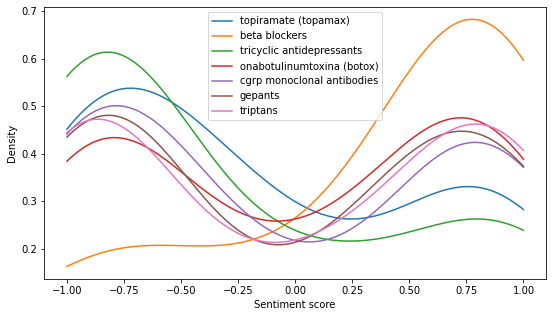

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt_1 = plt.figure(figsize=(9, 5))

# importing diamond dataset from the library
df = pd.read_csv('/content/new_group_sa_merge_user_output.csv', usecols=['sentiment_score', 'generic_name'])

# selected = proc(df, 40)
selected = ['Topiramate (Topamax)','Beta Blockers','Tricyclic antidepressants','OnabotulinumtoxinA (Botox)','CGRP monoclonal antibodies','Gepants','Triptans','Lasmiditan (Reyvow)','Dihydroergotamine (DHE)']
selected = [x.lower() for x in selected]    #All in lower letters

# plotting density plot for carat using distplot()
for name in selected:
    # scores = df[df['generic_name'] == name].sentiment_score.values.tolist()
    temp_df = statistic_values[statistic_values['group_name']==name].reset_index(drop=True)
    scores = temp_df['sentiment_scores'][0]
    # scores = statistic_values[statistic_values['group_name']==name]['sentiment_scores'][0]
    # sns.distplot(a=scores, hist=True, rug=False, kde=False, label=name)
    sns.kdeplot(scores, label=name, clip=[-1, 1])

# visualizing plot using matplotlib.pyplot library
plt.xlabel('Sentiment score')
plt.legend()
plt.show()
